<div align="center">

# **Predictive analytics report - Start-ups: Funding and Acquisitions**


---
</div>

# Section #1. Problem Definition, Data & Objectives


**Problem definition:**
Crunchbase is a reference to take financial informed decisions regarding finding investment opportunities and connecting with investors. With all the available information, ***how can we know which startup would be best to invest? and how can we know the likehood of our startup to succeed?*** 


**Data:**
Crunchbase data contains crowdsourced information on a large number of startups including who invested in them and how much. Data includes Companies across the world that have raised money, Investors (individual and institutional) that have invested in those
companies, Funding rounds of investment, and records of all acquisitions of these startups.


**Objectives:**
Build a model to predict possible success of a startup, i.e., operating. 

Current status are:
- Operating
- Acquired
- Closed
- IPO (Initial Public Offering)

# Section #2. Data Preprocessing & Transformation

**Data Preprocessing**

Our chosen data source have a total of file files: "Companies", "Acquisitions", "Investments", "Additions", "Rounds" 


As a general rule, we identified and selected the following common features: *company_name, company_list, company_country_code, investor_name, investor_country_code,founding_round_type, funded_at, raised_amount_used, acquirer_name, acquirer_category_list, acquirer_country_code*



**Data cleaning**
- Labelling.
- Converted nulls to zeroes for continuous features.
- Split for names - permalinks.
- Joined (outer) companies with investors to cross with status.
- Re-categorized companies for single-record categories.
- Virtually dropped unused features.




# Section #3. Proposed Approach/Tools
**Approach:**
- Study the business problem behind the data.
- Establish objectives and requirements.
- Data cleaning.
- Data visualization.
- Develop predictive models.
- Analyze performance of models.
- Recommendations and insights.

---

**Tools**
- Tableau (Data Visualization).
- Google Colab.
- Python + Libraries.

---

**Methods**
- Random Forest.
- K Nearest Neighbour.
- Artificial Neural Network

---

**Tasks**


1. Business understanding of every feature.
2. Define the target feature. 
3. Consider data availability.
4. Study data quality.
5. Clean and organize data.
6. Generate visualizations for understanding.
7. Process data for modelling.
8. Modelling.
9. Verify accuracy.
10. Conclusions and recommendations.

# Section #4: Project Outcome

---



## Main data import - %Run me first%

In [ ]:
# Main data import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Loading data from online repository
acq = pd.read_csv('http://web.mangata.blog/652data/acquisitions.csv')
additions = pd.read_csv('http://web.mangata.blog/652data/additions.csv')
companies = pd.read_csv('http://web.mangata.blog/652data/companies.csv')
investments = pd.read_csv('http://web.mangata.blog/652data/investments.csv')
rounds = pd.read_csv('http://web.mangata.blog/652data/rounds.csv')
comp_conv = pd.read_csv('http://web.mangata.blog/652data/companiesconverted.csv')
#Disable warning
import warnings
warnings.filterwarnings("ignore")
#Selecting only relevant features
cleaned_companies= comp_conv[["permalink","name","category","category_list","funding_total_usd","status", "status1", "country_code", "country","funding_rounds", "year"]]

#Cleaning permalinks column to use for joins
cleaned_companies.permalink = companies.permalink.str.split('/').str.get(-1)

#Fixing data quality: zero values have a - character
cleaned_companies['funding_total_usd'] = cleaned_companies['funding_total_usd'].str.replace('-','0').astype(float)

cleaned_companies.head()

,permalink,name,category,category_list,funding_total_usd,status,status1,country_code,country,funding_rounds,year
0,-fame,#fame,Media,21,10000000.0,4,operating,4,IND,1,NaN
1,-qounter,:Qounter,Application Platforms|Real Time|Social Network...,21,700000.0,4,operating,1,USA,2,2014.0
2,-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,21,3406878.0,4,operating,11,NaN,1,NaN
3,0-6-com,0-6.com,Curated Web,6,2000000.0,4,operating,5,CHN,1,2007.0
4,004-technologies,004 Technologies,Software,1,0.0,4,operating,1,USA,1,2010.0


## Data correction

We analized each file and created statistics and visualizations to determine the data quality and possible corrections. 

In [ ]:

print(cleaned_companies.info())
print('Shape of dataframe:', cleaned_companies.shape)
cleaned_companies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          66368 non-null  object 
 1   name               66367 non-null  object 
 2   category           63220 non-null  object 
 3   category_list      66368 non-null  int64  
 4   funding_total_usd  66368 non-null  float64
 5   status             66368 non-null  int64  
 6   status1            66368 non-null  object 
 7   country_code       66368 non-null  int64  
 8   country            59410 non-null  object 
 9   funding_rounds     66368 non-null  int64  
 10  year               51039 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 5.6+ MB
None
Shape of dataframe: (66368, 11)


,permalink,name,category,category_list,funding_total_usd,status,status1,country_code,country,funding_rounds,year
0,-fame,#fame,Media,21,10000000.0,4,operating,4,IND,1,NaN
1,-qounter,:Qounter,Application Platforms|Real Time|Social Network...,21,700000.0,4,operating,1,USA,2,2014.0
2,-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,21,3406878.0,4,operating,11,NaN,1,NaN
3,0-6-com,0-6.com,Curated Web,6,2000000.0,4,operating,5,CHN,1,2007.0
4,004-technologies,004 Technologies,Software,1,0.0,4,operating,1,USA,1,2010.0


In [ ]:
cleaned_companies.isnull().sum()

permalink                0
name                     1
category              3148
category_list            0
funding_total_usd        0
status                   0
status1                  0
country_code             0
country               6958
funding_rounds           0
year                 15329
dtype: int64

In [ ]:
cleaned_companies['category_list'].fillna(0)

0        21
1        21
2        21
3         6
4         1
         ..
66363    10
66364    21
66365    21
66366    21
66367    21
Name: category_list, Length: 66368, dtype: int64

In [ ]:
cleaned_companies['country_code'].fillna(0)

0         4
1         1
2        11
3         5
4         1
         ..
66363     5
66364    11
66365    11
66366     1
66367    11
Name: country_code, Length: 66368, dtype: int64

In [ ]:
cleaned_companies['year'].fillna(0)

0           0.0
1        2014.0
2           0.0
3        2007.0
4        2010.0
          ...  
66363       0.0
66364    2012.0
66365    2011.0
66366    2014.0
66367       0.0
Name: year, Length: 66368, dtype: float64

In [ ]:
cleaned_companies.isnull().values.any()

True

In [ ]:
cleaned_companies.head()

,permalink,name,category,category_list,funding_total_usd,status,status1,country_code,country,funding_rounds,year
0,-fame,#fame,Media,21,10000000.0,4,operating,4,IND,1,NaN
1,-qounter,:Qounter,Application Platforms|Real Time|Social Network...,21,700000.0,4,operating,1,USA,2,2014.0
2,-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,21,3406878.0,4,operating,11,NaN,1,NaN
3,0-6-com,0-6.com,Curated Web,6,2000000.0,4,operating,5,CHN,1,2007.0
4,004-technologies,004 Technologies,Software,1,0.0,4,operating,1,USA,1,2010.0


Focus on the top 20 categories only. We wanted to evaluate the top 20 against working with the full data set. The end result was practically the same, since most of the records had common categories, and the special categories tipically had 1 record.


For the final work we added a "corrected" file including the data corrections, to make the process faster and clearer. However, original files are also availables.





In [ ]:
c1=cleaned_companies.sort_values(['category_list'],ascending=True)
c1.head()

,permalink,name,category,category_list,funding_total_usd,status,status1,country_code,country,funding_rounds,year
58765,towercare-technologies,DonorPro,Software,1,425101.0,4,operating,1,USA,1,2002.0
12148,codasip,Codasip,Software,1,2800000.0,2,closed,1,USA,1,NaN
53810,sphera-corporation,Sphera Corporation,Software,1,7000000.0,1,acquired,11,NaN,2,NaN
53807,spf-solutions,SPF Solutions,Software,1,130000.0,4,operating,1,USA,2,2013.0
27503,infinisource,Infinisource,Software,1,0.0,4,operating,1,USA,1,NaN


In [ ]:
c1 = c1[c1.category_list != 21]
c1.head()

,permalink,name,category,category_list,funding_total_usd,status,status1,country_code,country,funding_rounds,year
58765,towercare-technologies,DonorPro,Software,1,425101.0,4,operating,1,USA,1,2002.0
12148,codasip,Codasip,Software,1,2800000.0,2,closed,1,USA,1,NaN
53810,sphera-corporation,Sphera Corporation,Software,1,7000000.0,1,acquired,11,NaN,2,NaN
53807,spf-solutions,SPF Solutions,Software,1,130000.0,4,operating,1,USA,2,2013.0
27503,infinisource,Infinisource,Software,1,0.0,4,operating,1,USA,1,NaN


## Visualizations

We worked in some visualizations first to understand the data distribution and quality.



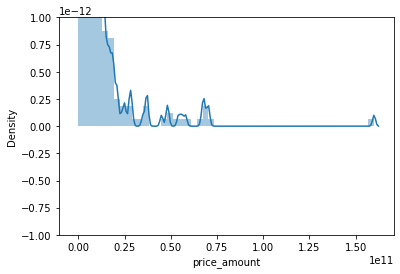

In [ ]:

sns.distplot (acq.price_amount, 50)

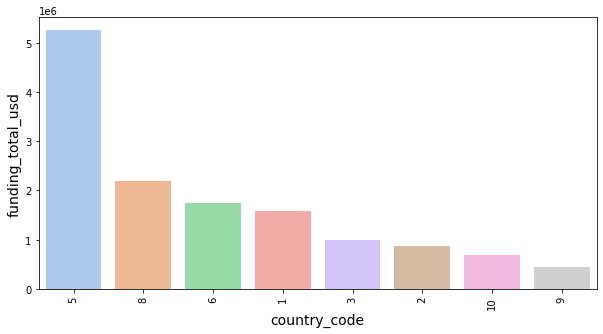

In [ ]:
#Simple plot to understand countries and funding amounts

result = cleaned_companies.groupby(["country_code"])['funding_total_usd'].median().reset_index().sort_values('funding_total_usd',ascending = False)[:8]
norm = plt.Normalize(cleaned_companies["funding_total_usd"].values.min(), cleaned_companies["funding_total_usd"].values.max())
colors = plt.cm.Reds(norm(cleaned_companies["funding_total_usd"])) 
plt.figure(figsize=(10,5))
sns.barplot(x='country_code', y="funding_total_usd", data=result, palette='pastel',  order=result['country_code'])

plt.ylabel('funding_total_usd', fontsize=14)
plt.xlabel('country_code', fontsize=14)
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
print(result)

   country_code  funding_total_usd
4             5          5252740.5
7             8          2200000.0
5             6          1750000.0
0             1          1575000.0
2             3          1000000.0
1             2           883012.5
9            10           700000.0
8             9           450000.0


In [ ]:
acq.isnull().sum()




company_permalink             0
company_name                  0
company_category_list      4983
company_country_code       4668
company_state_code         4948
company_region             4910
company_city               4910
acquirer_permalink            0
acquirer_name                 0
acquirer_category_list     2388
acquirer_country_code      1170
acquirer_state_code        1435
acquirer_region            1359
acquirer_city              1359
acquired_at                  12
acquired_month               14
price_amount              13956
price_currency_code           6
dtype: int64

In [ ]:
acq['company_category_list'].value_counts()


Software                                            1459
Curated Web                                          580
Biotechnology                                        546
Enterprise Software                                  398
Mobile                                               317
                                                    ... 
SaaS|Sales and Marketing|Software                      1
Application Platforms|Service Providers|Services       1
Consulting|Design|User Experience Design               1
FreetoPlay Gaming|Games|MMO Games                      1
CA                                                     1
Name: company_category_list, Length: 5930, dtype: int64

In [ ]:
acq['acquirer_name'].value_counts()


Cisco                                    193
Google                                   176
Microsoft                                161
IBM (International Business Machines)    138
Yahoo!                                   118
                                        ... 
Prime Active Capital                       1
Wilcon                                     1
Eco Green Auto Clean                       1
Iotum                                      1
2000                                       1
Name: acquirer_name, Length: 9475, dtype: int64

In [ ]:
cleaned_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          66368 non-null  object 
 1   name               66367 non-null  object 
 2   category           63220 non-null  object 
 3   category_list      66368 non-null  int64  
 4   funding_total_usd  66368 non-null  float64
 5   status             66368 non-null  int64  
 6   status1            66368 non-null  object 
 7   country_code       66368 non-null  int64  
 8   country            59410 non-null  object 
 9   funding_rounds     66368 non-null  int64  
 10  year               51039 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 5.6+ MB


In [ ]:
cleaned_companies.head()

,permalink,name,category,category_list,funding_total_usd,status,status1,country_code,country,funding_rounds,year
0,-fame,#fame,Media,21,10000000.0,4,operating,4,IND,1,NaN
1,-qounter,:Qounter,Application Platforms|Real Time|Social Network...,21,700000.0,4,operating,1,USA,2,2014.0
2,-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,21,3406878.0,4,operating,11,NaN,1,NaN
3,0-6-com,0-6.com,Curated Web,6,2000000.0,4,operating,5,CHN,1,2007.0
4,004-technologies,004 Technologies,Software,1,0.0,4,operating,1,USA,1,2010.0


##  Merging companies with investors

We explored the option of merging the main file "companies" with the secondary "investors". The information acquired was valuable, however it escaped our main scope, so we used it in an informational way only.

In [ ]:

cleaned_investments = investments[["company_permalink","company_name","investor_permalink","investor_name","company_category_list","company_country_code","investor_country_code","raised_amount_usd"]]
cleaned_investments.company_permalink = cleaned_investments.company_permalink.str.split('/').str.get(-1)

cleaned_investments.head()


,company_permalink,company_name,investor_permalink,investor_name,company_category_list,company_country_code,investor_country_code,raised_amount_usd
0,0-6-com,0-6.com,/organization/dt-capital-partners,DT Capital Partners,Curated Web,CHN,CHN,2000000.0
1,004-technologies,004 Technologies,/organization/venturecapital-de,VCDE Venture Partners,Software,USA,DEU,NaN
2,01games-technology,01Games Technology,/organization/cyberport-hong-kong,Cyberport Hong Kong,Games,HKG,HKG,41250.0
3,0xdata,H2O.ai,/organization/capital-one,Capital One,Analytics,USA,USA,20000000.0
4,0xdata,H2O.ai,/organization/nexus-venture-partners,Nexus Venture Partners,Analytics,USA,USA,3000000.0


In [ ]:
print(cleaned_investments.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168647 entries, 0 to 168646
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company_permalink      168647 non-null  object 
 1   company_name           168646 non-null  object 
 2   investor_permalink     168635 non-null  object 
 3   investor_name          168635 non-null  object 
 4   company_category_list  165015 non-null  object 
 5   company_country_code   158126 non-null  object 
 6   investor_country_code  137708 non-null  object 
 7   raised_amount_usd      147028 non-null  float64
dtypes: float64(1), object(7)
memory usage: 10.3+ MB
None


In [ ]:
print(cleaned_companies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          66368 non-null  object 
 1   name               66367 non-null  object 
 2   category           63220 non-null  object 
 3   category_list      66368 non-null  int64  
 4   funding_total_usd  66368 non-null  float64
 5   status             66368 non-null  int64  
 6   status1            66368 non-null  object 
 7   country_code       66368 non-null  int64  
 8   country            59410 non-null  object 
 9   funding_rounds     66368 non-null  int64  
 10  year               51039 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 5.6+ MB
None


In [ ]:
#Merge by permalink
merged_pl = cleaned_companies.merge(cleaned_investments, left_on='permalink',right_on='company_permalink')

#Merge by name directly
merged_name = cleaned_companies.merge(cleaned_investments, left_on='name', right_on='company_name')

#cleaned_companies.info() #66368
#cleaned_investments.info() #168647

#merged_pl.info() #168646
#merged_name.info() #170726


In [ ]:
merged_pl.head()

,permalink,name_x,category_list,funding_total_usd,status,country_code,funding_rounds,name_y,investor_permalink,investor_name,company_category_list,company_country_code,investor_country_code,raised_amount_usd
0,0-6-com,0-6.com,Curated Web,2000000,operating,CHN,1,0-6.com,/organization/dt-capital-partners,DT Capital Partners,Curated Web,CHN,CHN,2000000.0
1,004-technologies,004 Technologies,Software,-,operating,USA,1,004 Technologies,/organization/venturecapital-de,VCDE Venture Partners,Software,USA,DEU,NaN
2,01games-technology,01Games Technology,Games,41250,operating,HKG,1,01Games Technology,/organization/cyberport-hong-kong,Cyberport Hong Kong,Games,HKG,HKG,41250.0
3,0xdata,H2O.ai,Analytics,33600000,operating,USA,4,H2O.ai,/organization/capital-one,Capital One,Analytics,USA,USA,20000000.0
4,0xdata,H2O.ai,Analytics,33600000,operating,USA,4,H2O.ai,/organization/nexus-venture-partners,Nexus Venture Partners,Analytics,USA,USA,3000000.0


In [ ]:
print(merged_pl.info()), print(merged_name.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168646 entries, 0 to 168645
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   permalink              168646 non-null  object 
 1   name                   168645 non-null  object 
 2   category               165014 non-null  object 
 3   category_list          168646 non-null  int64  
 4   funding_total_usd      168646 non-null  float64
 5   status                 168646 non-null  int64  
 6   status1                168646 non-null  object 
 7   country_code           168646 non-null  int64  
 8   country                158125 non-null  object 
 9   funding_rounds         168646 non-null  int64  
 10  year                   141994 non-null  float64
 11  company_permalink      168646 non-null  object 
 12  company_name           168645 non-null  object 
 13  investor_permalink     168634 non-null  object 
 14  investor_name          168634 non-nu

(None, None)

In [ ]:
#Decoding features for heatmap

cleaned_companies['category_list'].value_counts().nlargest(100).to_frame()

,category_list
21,45056
1,3995
2,3615
3,1332
4,1177
5,1133
6,1050
7,932
8,930
9,862


## Converting categotical values to numerical values

As our models are going to predict the actual status of a startup, we are facing a regression modelling problem. In order to solve this, categorical values must be converted to numerical values. 

In order to convert categorical feature "categoy_list" we ordered the categories in terms or recurrence. We picked the first 20 and convertered to numerical values. 
Assumptions:
- We added an additional 21 value "others" that encompases the rest of the categories.
- Blanks were converted 0 and included in the category 21

Text(0, 0.5, 'Frequency')

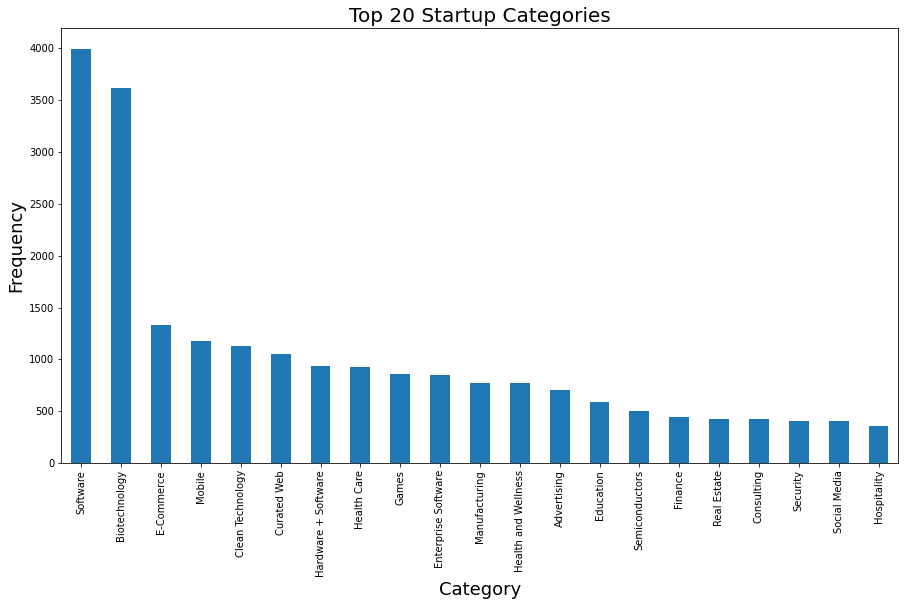

In [ ]:
cleaned_companies['category'].value_counts().head(21).plot(kind='bar',figsize=(15,8))
plt.title("Top 20 Startup Categories",fontsize=20)
plt.xlabel("Category",fontsize=18)
plt.ylabel("Frequency",fontsize=18)

In order to convert categorical feature "country_code" we ordered the categories in terms or recurrence. We picked the first 10 and convertered to numerical values.  Assumptions:

We added an additional 11 value "others" that encompases the rest of the categories.
Blanks were converted 0 and included in the category 11

Text(0, 0.5, 'Frequency')

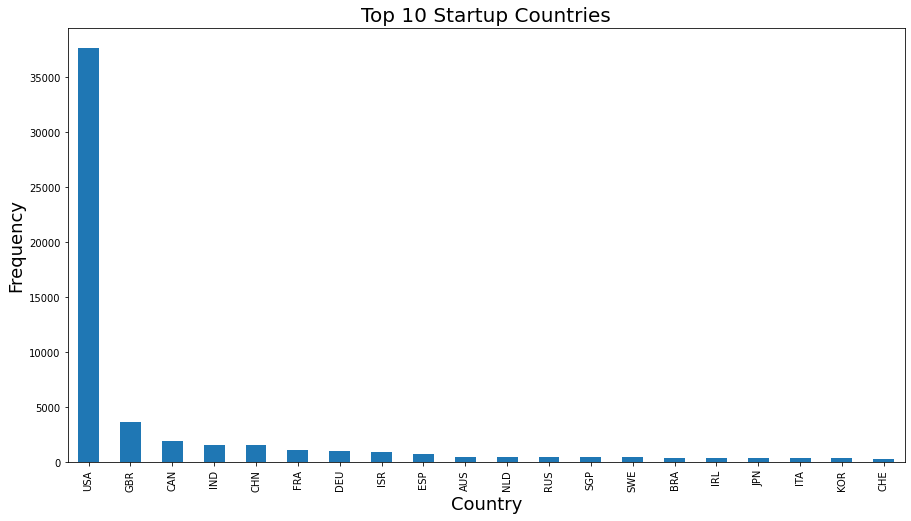

In [ ]:
cleaned_companies['country'].value_counts().head(20).plot(kind='bar',figsize=(15,8))
plt.title("Top 10 Startup Countries",fontsize=20)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Frequency",fontsize=18)

Categorical feature "status" was converted as well with the following values:

1. Acquired
2. Closed
3. Ipo
4. Operating




Text(0, 0.5, 'Frequency')

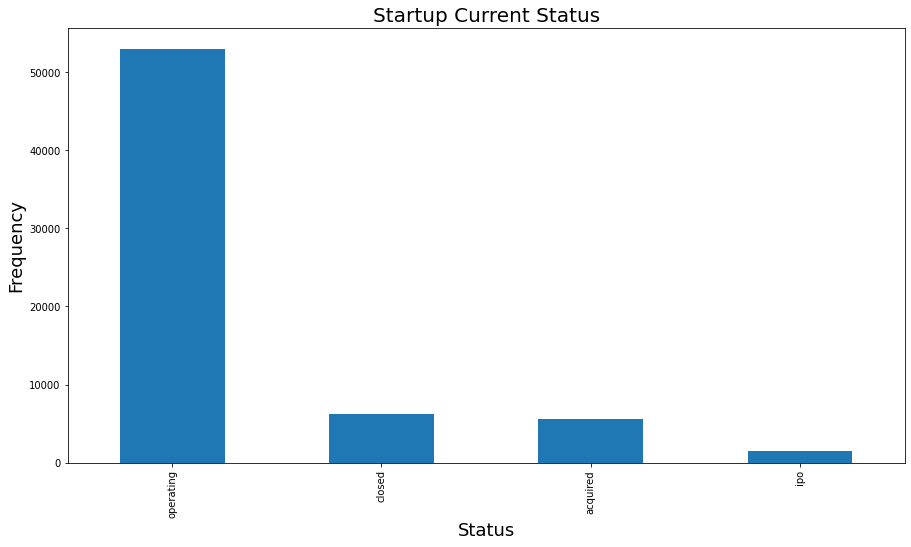

In [ ]:
cleaned_companies['status1'].value_counts().head(4).plot(kind='bar',figsize=(15,8))
plt.title("Startup Current Status",fontsize=20)
plt.xlabel("Status",fontsize=18)
plt.ylabel("Frequency",fontsize=18)

## Encoding categorical values

Another way we found to manage categorical values is with the process of hot encoding. In this way we can directly manage the features in Python for the modelling. 

In [ ]:
cleaned_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          66368 non-null  object 
 1   name               66367 non-null  object 
 2   category           63220 non-null  object 
 3   category_list      66368 non-null  int64  
 4   funding_total_usd  66368 non-null  float64
 5   status             66368 non-null  int64  
 6   status1            66368 non-null  object 
 7   country_code       66368 non-null  int64  
 8   country            59410 non-null  object 
 9   funding_rounds     66368 non-null  int64  
 10  year               51039 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 5.6+ MB


In [ ]:
df_cmp = cleaned_companies[["category_list","funding_total_usd","status","country_code","funding_rounds","year"]]


In [ ]:
df_cmp.head()

,category_list,funding_total_usd,status,country_code,funding_rounds,year
0,21,10000000.0,4,4,1,NaN
1,21,700000.0,4,1,2,2014.0
2,21,3406878.0,4,11,1,NaN
3,6,2000000.0,4,5,1,2007.0
4,1,0.0,4,1,1,2010.0


In [ ]:
#Encoding companies.country_code 
df_cmp = cleaned_companies[["category_list","funding_total_usd","status","country_code","funding_rounds","year"]]

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

cat_cols = ['category_list']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_cmp[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categotical Data with Encoded Data
df_cmp = df_cmp.drop(cat_cols ,axis=1)
df_cmp = pd.concat([df_encoded, df_cmp], axis=1)

print('Shape of dataframe:', df_cmp.shape)
df_cmp.head()

Shape of dataframe: (66368, 26)


,category_list_1,category_list_2,category_list_3,category_list_4,category_list_5,category_list_6,category_list_7,category_list_8,category_list_9,category_list_10,...,category_list_17,category_list_18,category_list_19,category_list_20,category_list_21,funding_total_usd,status,country_code,funding_rounds,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,10000000.0,4,4,1,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,700000.0,4,1,2,2014.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3406878.0,4,11,1,NaN
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2000000.0,4,5,1,2007.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,1,2010.0


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

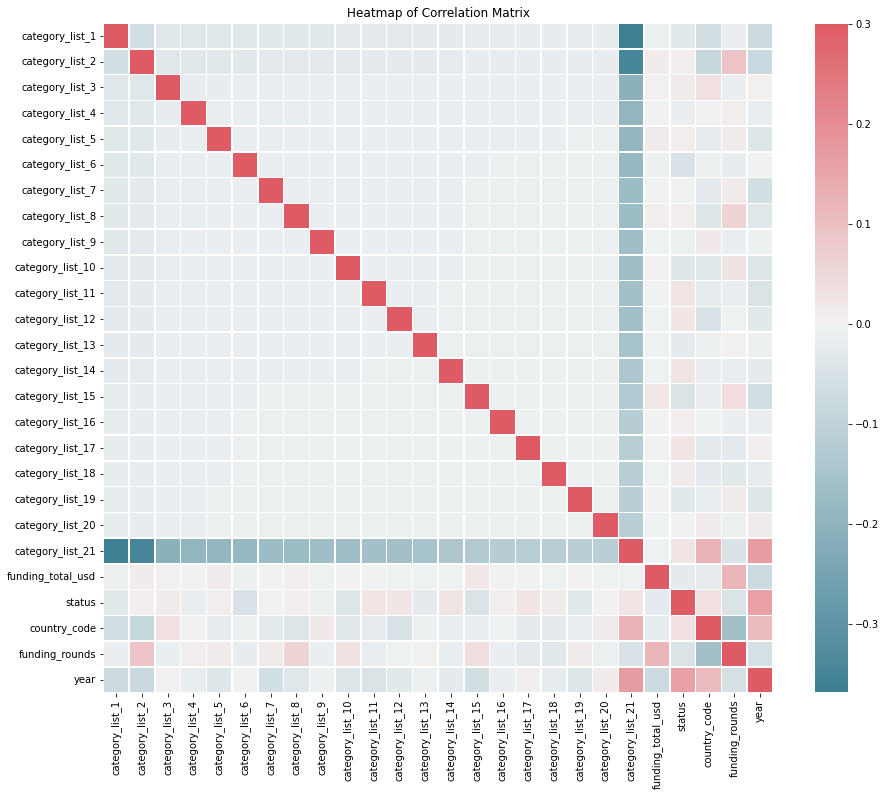

In [ ]:
corr = df_cmp.corr()
# Heatmap
plt.figure(figsize = (15,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

## Predictive Models


The predictive models presented are Random Forest, KNN and Artificial Neural Network

In [ ]:
#Define variables for models
x=cleaned_companies[["category_list","funding_total_usd", "country_code","funding_rounds"]]
y=cleaned_companies["status"]

#Disable warning
import warnings
warnings.filterwarnings("ignore")


In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred,average='micro') #added micro
    rec = metrics.recall_score(y_test, y_pred,average='micro')
    f1 = metrics.f1_score(y_test, y_pred,average='micro')
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    #fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba) #Removed for compatibility
    #auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    disp = metrics.ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()

    print(metrics.classification_report(y_test, y_pred))

    #return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}
    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 'cm': cm}


### Random Forest


Random Forest is one of the most accurate algorithym as it can run efficiently on large databases. Random Forest was one of our options to build predictive models as it can be used for regression taks.  

In [ ]:
#Import libraries
from sklearn.ensemble import RandomForestRegressor
import statistics

In [ ]:
#Defining model
rf = RandomForestRegressor(n_estimators= 1000, random_state=0, max_features=3)

In [ ]:
#Fitting model
rf.fit(x,y)

RandomForestRegressor(max_features=3, n_estimators=1000, random_state=0)

In [ ]:
#Measuring model accuracy
rfpredictions = rf.predict(x)
rferror_rate=abs(rfpredictions-y)
rfmape=100*(rferror_rate/y)
rfaccuracy = 100 - statistics.mean(rfmape)

In [ ]:
#Random Forest Accuracy
print ("Random Forest Model's accuracy:%.2f"%rfaccuracy)

Random Forest Model's accuracy:76.28


**Random Forest focusing only on the top 20 categories**

To see how our model would behave or if it would present significant changes by taking the assumption to encompass as "others" the categories that weren't on the top 20, we decided to model a Random Forest focusing only on the Top 20 categories. As the results can be seen, the accuracy obtained was 76.10% vs 73.63% for our general model, meaning that our main model is not affected in a large degree by the assumption made. 

In [ ]:
#Defining variables
x_c1=c1[["category_list","funding_total_usd", "country_code","funding_rounds"]]
y_c1=c1["status"]

In [ ]:
#Modelling
rf.fit(x_c1,y_c1)

RandomForestRegressor(max_features=3, n_estimators=1000, random_state=0)

In [ ]:
rfpredictions1 = rf.predict(x_c1)
print(rfpredictions1)

[3.985      3.11488095 1.88545    ... 3.979      3.99543225 3.99866667]


In [ ]:
rferror_rate1=abs(rfpredictions1-y_c1)
print(rferror_rate1)

58765    0.015000
12148    1.114881
53810    0.885450
53807    0.073000
27503    0.462943
           ...   
32706    0.067000
52831    0.765946
65940    0.021000
63240    0.004568
36973    0.001333
Name: status, Length: 21312, dtype: float64


In [ ]:
rfmape1=100*(rferror_rate1/y_c1)
print(rfmape1)

58765     0.375000
12148    55.744048
53810    88.545000
53807     1.825000
27503    11.573574
           ...    
32706     1.675000
52831    19.148654
65940     0.525000
63240     0.114194
36973     0.033333
Name: status, Length: 21312, dtype: float64


In [ ]:
#Model accuracy
rfaccuracy1 = 100 - statistics.mean(rfmape1)
print(rfaccuracy1)

80.3926908411047


In [ ]:
print ("Random Forest Model's accuracy: %.2f" %rfaccuracy1)

Random Forest Model's accuracy: 80.39


### KNN
"KNN lassify new data by finding k-number of closest neighbor from the training data and then decide the class based on the majority of it's neighbors". 

Our objective is to determine if a company is active or not, KNN makes perfect sense since companies with similar behaviour might have a similar outcome.




In [ ]:
# Select Features
# Dropped year because nearly 25% is null
df_cmp = cleaned_companies[["category_list","funding_total_usd","status","country_code","funding_rounds"]]

feature = df_cmp.drop('status', axis=1)

# Select Target
target = df_cmp['status']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (53094, 4)
Shape of testing feature: (13274, 4)
Shape of training label: (53094,)
Shape of training label: (13274,)


In [ ]:
X_train.info(),
X_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53094 entries, 12180 to 5192
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category_list      53094 non-null  int64  
 1   funding_total_usd  53094 non-null  float64
 2   country_code       53094 non-null  int64  
 3   funding_rounds     53094 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 2.0 MB


category_list        0
funding_total_usd    0
country_code         0
funding_rounds       0
dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

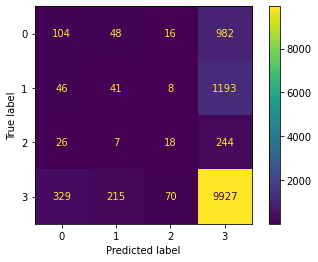

              precision    recall  f1-score   support

           1       0.21      0.09      0.13      1150
           2       0.13      0.03      0.05      1288
           3       0.16      0.06      0.09       295
           4       0.80      0.94      0.87     10541

    accuracy                           0.76     13274
   macro avg       0.33      0.28      0.28     13274
weighted avg       0.67      0.76      0.71     13274

Accuracy: 0.760132590025614
Precision: 0.760132590025614
Recall: 0.760132590025614
F1 Score: 0.760132590025614
Cohens Kappa Score: 0.06174010776473915
Confusion Matrix:
 [[ 104   48   16  982]
 [  46   41    8 1193]
 [  26    7   18  244]
 [ 329  215   70 9927]]


In [ ]:
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
#print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

### Artificial Neural Network
We chose this model as we can analyze complex and non-linear relationship between our target and the selected features, giving us the opportunity to explore in a greater way how our target feature is related to the other selected features.



In [ ]:
#Neural network library
from keras.layers import Dense, Activation
from keras.models import Sequential

In [ ]:
#Initialising the NN
model = Sequential()

In [ ]:
#Adding the input layer and the first hidden layer
model.add(Dense(30, activation = 'tanh',input_dim = 4))

#Adding hidden layer 2
model.add(Dense(units = 30, activation ='tanh'))
#Adding hidden layer 3
model.add(Dense(units = 30, activation ='tanh'))
#Adding hidden layer 4
model.add(Dense(units = 30, activation ='tanh'))
#Adding hidden layer 5
model.add(Dense(units = 30, activation ='tanh'))
#Adding hidden layer 6
model.add(Dense(units = 30, activation ='tanh'))
#Adding hidden layer 7
model.add(Dense(units = 30, activation ='tanh'))
#Adding hidden layer 8
model.add(Dense(units = 30, activation ='tanh'))
#Adding hidden layer 9
model.add(Dense(units = 30, activation ='tanh'))
#Adding hidden layer 10
model.add(Dense(units = 30, activation ='tanh'))
#Adding hidden layer 11
model.add(Dense(units = 30, activation ='tanh'))
#Adding hidden layer 12
model.add(Dense(units = 30, activation ='tanh'))
#Adding hidden layer 13
model.add(Dense(units = 30, activation ='tanh'))
#Adding hidden layer 14
model.add(Dense(units = 30, activation ='tanh'))
#Adding hidden layer 15
model.add(Dense(units = 30, activation ='tanh'))
#Adding hidden layer 16
model.add(Dense(units = 30, activation ='tanh'))

#adding output layer
model.add(Dense(units=1))

In [ ]:
#check for optimizer and metrics
model.compile(loss='mean_squared_error', optimizer='adam', metrics =['accuracy'])

In [ ]:
#fitting the data into the neural network. It can be seen that the model converges at about 15 epoch. In order to decrease the run time of the model, the number of epoch can be reduced to 15 

In [ ]:
model.fit(x,y, validation_split=0.20, epochs=100, batch_size=10)

Epoch 1/100
5310/5310 [==============================] - 17s 3ms/step - loss: 0.9444 - accuracy: 0.0843 - val_loss: 0.9326 - val_accuracy: 0.0810
Epoch 2/100
5310/5310 [==============================] - 19s 4ms/step - loss: 0.9445 - accuracy: 0.0843 - val_loss: 0.9336 - val_accuracy: 0.0810
Epoch 3/100
5310/5310 [==============================] - 18s 3ms/step - loss: 0.9451 - accuracy: 0.0843 - val_loss: 0.9301 - val_accuracy: 0.0810
Epoch 4/100
5310/5310 [==============================] - 18s 3ms/step - loss: 0.9449 - accuracy: 0.0843 - val_loss: 0.9321 - val_accuracy: 0.0810
Epoch 5/100
5310/5310 [==============================] - 19s 4ms/step - loss: 0.9445 - accuracy: 0.0843 - val_loss: 0.9303 - val_accuracy: 0.0810
Epoch 6/100
5310/5310 [==============================] - 18s 3ms/step - loss: 0.9444 - accuracy: 0.0843 - val_loss: 0.9378 - val_accuracy: 0.0810
Epoch 7/100
5310/5310 [==============================] - 17s 3ms/step - loss: 0.9447 - accuracy: 0.0843 - val_loss: 0.9318 -

In [ ]:
#Fitting the model with 15 epoch
model.fit(x,y, validation_split=0.20, epochs=15, batch_size=10)

Epoch 1/15
5310/5310 [==============================] - 21s 4ms/step - loss: 0.9449 - accuracy: 0.0843 - val_loss: 0.9302 - val_accuracy: 0.0810
Epoch 2/15
5310/5310 [==============================] - 20s 4ms/step - loss: 0.9455 - accuracy: 0.0843 - val_loss: 0.9327 - val_accuracy: 0.0810
Epoch 3/15
5310/5310 [==============================] - 20s 4ms/step - loss: 0.9450 - accuracy: 0.0843 - val_loss: 0.9413 - val_accuracy: 0.0810
Epoch 4/15
5310/5310 [==============================] - 19s 4ms/step - loss: 0.9453 - accuracy: 0.0843 - val_loss: 0.9318 - val_accuracy: 0.0810
Epoch 5/15
5310/5310 [==============================] - 20s 4ms/step - loss: 0.9455 - accuracy: 0.0843 - val_loss: 0.9293 - val_accuracy: 0.0810
Epoch 6/15
5310/5310 [==============================] - 20s 4ms/step - loss: 0.9459 - accuracy: 0.0843 - val_loss: 0.9294 - val_accuracy: 0.0810
Epoch 7/15
5310/5310 [==============================] - 20s 4ms/step - loss: 0.9459 - accuracy: 0.0843 - val_loss: 0.9291 - val_ac

In [ ]:
#Creating a variable for the prediction
predictions = model.predict(x)

In [ ]:
#Measuring accuracy
_, nn_accuracy = model.evaluate(x, y)

2074/2074 [==============================] - 6s 3ms/step - loss: 0.9421 - accuracy: 0.0836


In [ ]:
print('Neural Network Accuracy: %.2f' % (nn_accuracy*100))
print('Validation Accuracy: %.2f' % (0.0810*100))

Neural Network Accuracy: 8.36
Validation Accuracy: 8.10


# Section #5. Challenges



*   Working with categorical features: 75% of the fetures selected for modelling were categorical, which presented us with the challenge to find the best way to manage them.However, this lead us to came up with solutions that could allow us to properly work and design models. 





*   Low accuracy for the Artificial Neural Network:making a prediction with this model resulted complex and we couldn't find a way to increase the accuracy in this model





*   Model comparison: for Random Forest and Artificial Neural Network we were able to measure accuracy. We faced some challenges with coding, for example we are using the Random Forest to do a regression for prediction, so we couldn't use the function evaluate_model(rf, X_test, y_test) as this function only seemed to work for Random Forest Classifier. For our KNN, the ROC/AUC didn't work because of the selection, but we were able to work around these challenges.




# Section #6: Conclusion & Future Work

#### Category domain

* The category feature had issues like this:

```
  SaaS|Sales and Marketing|Software                      1
  Application Platforms|Service Providers|Services       1
  Consulting|Design|User Experience Design               1
  FreetoPlay Gaming|Games|MMO Games                      1
```




We would have liked to convert them to regular data, meaning splitting one row [SaaS|Sales and Marketing|Software] into 3 or 4 rows with 1 category each, but we lacked time and expertise to do it fast.

#### Improve accuracy

*   Improve accuracy of the Artificial Neural Network model. We would like to explore more about how to make improvements in this model to obtain a better accuracy. 



#### Incorporate acquisitions

* The initial idea was to incorporate analysis over the acquisitors, but we focused on the companies themselves, specially towards the target feature "Status". We would like to include investors and acquisitors for further predictions.


# Section #7: Performance Evaluation
---

##General




To test how the models work, we set parameters to test out the results. 
The parameters are based in the numerical values assigned for the categorical values (see Encoding categorical values for more reference). 

In [ ]:
#Define parameters to test models
parameter= [[2,500000,1,2]]

In [ ]:
#Making a prediction to test Random Forest Model
rftestprediction= rf.predict(parameter)
print ("RF status prediction:%.0f"%rftestprediction)


RF status prediction:4


In [ ]:
#Making a prediction to test KNN Model
knn_prediction=knn.predict(parameter)
print("KNN prediction: %.0f" %knn_prediction)

KNN prediction: 4


In [ ]:
#Making a prediction to test Artificial Neural Network Model
nn_prediction=model.predict(parameter) 
print('Neural Network Prediction: %.0f' %nn_prediction)

Neural Network Prediction: 4


Testing out the models with the defined parameters we can see that Random Forest and KNN give the same result as it was expected because they have a similar level of accuracy.

## Model comparison

The performance evaluation was done in-situ, at the end of each model.

As a conclusion we can say that for Random Forest and KNN the performance was very similar, close to 80%, which we considered as acceptable.

ANN's accuracy was very low, close to 8%, and we didn't have enough time to explore it further, but as first steps we believe two and a half prediction models were great.




<div align='center'><img src='http://web.mangata.blog/652data/team.png' ></div>

# Section #9: References

Joins in Pandas: Master the Different Types of Joins in Python

> https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/




Artificial Neural Network

> https://www.analyticsvidhya.com/blog/2021/08/a-walk-through-of-regression-analysis-using-artificial-neural-networks-in-tensorflow/#:~:text=Regression%20using%20Artificial%20Neural%20Networks&text=The%20purpose%20of%20using%20Artificial,the%20complex%20non%2Dlinear%20relationship.

Calculating accuracy of random forest for regression task

> https://www.codegrepper.com/code-examples/python/formula+for+calculating+accuracy+of+random+forest+for+regression+task

Hot Encoding

> https://www.educative.io/blog/one-hot-encoding

sklearn.ensemble.RandomForestRegressor

> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

K-Nearest Neighbors Algorithm Using Python

> https://www.edureka.co/blog/k-nearest-neighbors-algorithm/